In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                
import numpy as np          
import os                  
from random import shuffle      
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir("C:/Users/Deeksha Priya/Desktop/Plant disease prediction/PlantVillage")

In [4]:
cur_path = os.getcwd()

In [5]:
cur_path

'C:\\Users\\Deeksha Priya\\Desktop\\Plant disease prediction\\PlantVillage'

In [6]:
img_size =128
input_shape=(img_size,img_size,3)

In [7]:
def label_imgv2(word_label):
    if word_label == 'Pepper__bell___Bacterial_spot': return 0
    elif word_label == 'Pepper__bell___healthy': return 1
    elif word_label == 'Potato___Early_blight': return 2
    elif word_label == 'Potato___healthy': return 3
    elif word_label == 'Potato___Late_blight': return 4
    elif word_label == 'Tomato__Target_Spot': return 5
    elif word_label == 'Tomato__Tomato_mosaic_virus': return 6
    elif word_label == 'Tomato__Tomato_YellowLeaf__Curl_Virus': return 7
    elif word_label == 'Tomato_Bacterial_spot': return 8
    elif word_label == 'Tomato_Early_blight': return 9
    elif word_label == 'Tomato_healthy': return 10
    elif word_label == 'Tomato_Late_blight': return 11
    elif word_label == 'Tomato_Leaf_Mold': return 12
    elif word_label == 'Tomato_Septoria_leaf_spot': return 13
    elif word_label == 'Tomato_Spider_mites_Two_spotted_spider_mite': return 14

In [8]:
def create_train_data():
    training_data = []
    
    for folder in os.listdir(cur_path):
        i=0
        for img in os.listdir(cur_path+"/"+folder):
            i+=1
            path = os.path.join(cur_path+"/"+folder,img)
            
            try:
                label = label_imgv2(folder)
                img = cv2.imread(path,cv2.IMREAD_COLOR)
                img = cv2.resize(img, (img_size,img_size))
                training_data.append([np.array(img),np.array(label)])
            
            except:
                print(path)
            if i==500:
                break

    shuffle(training_data)
    return training_data

train_data = create_train_data()

In [9]:
train_y=np.array([i[1] for i in train_data])
train_x=np.array([i[0] for i in train_data]).reshape(-1,img_size,img_size,3)

train_x.shape

(7025, 128, 128, 3)

In [10]:
train_x=train_x/255
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

In [11]:
train_datagen = ImageDataGenerator(zoom_range=0.1, rotation_range=50,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_test, y_test, batch_size=20)

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(img_size,img_size,3)))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        244       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [13]:
custom=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/20
88/88 [==============================] - 351s 4s/step - loss: 2.2805 - accuracy: 0.2783 - val_loss: 2.8493 - val_accuracy: 0.0655
Epoch 2/20
88/88 [==============================] - 306s 3s/step - loss: 1.5174 - accuracy: 0.5198 - val_loss: 3.7284 - val_accuracy: 0.0655
Epoch 3/20
88/88 [==============================] - 314s 4s/step - loss: 1.1127 - accuracy: 0.6409 - val_loss: 4.5167 - val_accuracy: 0.0655
Epoch 4/20
88/88 [==============================] - 327s 4s/step - loss: 0.8742 - accuracy: 0.7130 - val_loss: 4.1656 - val_accuracy: 0.1295
Epoch 5/20
88/88 [==============================] - 301s 3s/step - loss: 0.7021 - accuracy: 0.7698 - val_loss: 3.4328 - val_accuracy: 0.2199
Epoch 6/20
88/88 [==============================] - 299s 3s/step - loss: 0.5907 - accuracy: 0.7984 - val_loss: 1.6059 - val_accuracy: 0.4968
Epoch 7/20
88/88 [==============================] - 290s 3s/step - loss: 0.5049 - accuracy: 0.8313 - val_loss: 0.9999 - val_accuracy: 0.6577
Epoch 8/20
88

In [14]:
predictions = model.predict(x_test)
predictions

array([[1.4235541e-04, 1.5572527e-02, 3.5637609e-06, ..., 1.9222280e-04,
        9.2704648e-01, 4.9202722e-03],
       [3.7032987e-06, 7.5217147e-05, 7.3889110e-05, ..., 2.1427932e-05,
        3.0430554e-05, 7.7939625e-08],
       [8.8024599e-06, 5.8604197e-08, 9.9804366e-01, ..., 1.6447363e-08,
        1.6537604e-03, 2.4789399e-09],
       ...,
       [1.2205950e-08, 3.0316809e-08, 7.1842014e-06, ..., 1.0317530e-04,
        7.3950920e-05, 4.9763985e-06],
       [2.7345317e-07, 5.7636855e-05, 2.1701588e-10, ..., 1.2889122e-10,
        2.6974575e-08, 9.0362697e-08],
       [3.3092537e-08, 1.3850829e-09, 1.1228618e-10, ..., 1.9918720e-05,
        2.2043564e-06, 9.9993038e-01]], dtype=float32)

In [15]:
y_preds = [np.argmax(i) for i in predictions]

In [16]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 90   7   1   0   0   0   0   3   0   3   0   0   0   0   1]
 [  3  80   0   0   0   0   0   0   0   1   0   0   0   2   0]
 [  0   1  92   0   6   0   0   0   0   1   0   0   0   3   0]
 [  0   2   0  31   3   1   0   0   0   0   0   0   1   0   0]
 [  0   0   1   2  89   0   0   2   2   3   0   1   1   2   1]
 [  0   1   0   0   1  88   1   0   0   0   2   1   0   5   8]
 [  0   0   0   0   0   0  68   0   0   1   0   0   1   0   0]
 [  0   0   0   0   0   0   0  86   1   1   0   2   0   0   0]
 [  0   0   0   0   0   0   0   4  85   3   0   0   0   0   0]
 [  2   0   0   0   3   5   3   1   2  79   0   4   0   1   1]
 [  0   0   0   0   0   1   0   0   0   0 104   0   0   1   1]
 [  2   2   3   0   1   1   0   0   1  11   1  67   3   4   2]
 [  1   0   0   0   0   0   1   0   1   2   0   0  78   8   1]
 [  2   2   2   1   0   2   2   2   5   2   0   2   2  89   1]
 [  1   0   0   0   3   4   1   3   0   2   0   0   0   0  84]]
              precision    recall  f1-score   support


In [17]:
custom = model.fit_generator(train_generator, epochs=50, validation_data=val_generator, verbose=1)

Epoch 1/50
176/176 [==============================] - 194s 1s/step - loss: 0.9295 - accuracy: 0.6963 - val_loss: 0.7843 - val_accuracy: 0.7495
Epoch 2/50
176/176 [==============================] - 186s 1s/step - loss: 0.7047 - accuracy: 0.7617 - val_loss: 0.5116 - val_accuracy: 0.8391
Epoch 3/50
176/176 [==============================] - 186s 1s/step - loss: 0.6089 - accuracy: 0.7941 - val_loss: 0.8600 - val_accuracy: 0.7409
Epoch 4/50
176/176 [==============================] - 185s 1s/step - loss: 0.5468 - accuracy: 0.8149 - val_loss: 0.7368 - val_accuracy: 0.7708
Epoch 5/50
176/176 [==============================] - 185s 1s/step - loss: 0.5156 - accuracy: 0.8199 - val_loss: 0.7441 - val_accuracy: 0.7751
Epoch 6/50
176/176 [==============================] - 185s 1s/step - loss: 0.4807 - accuracy: 0.8365 - val_loss: 0.6454 - val_accuracy: 0.7964
Epoch 7/50
176/176 [==============================] - 189s 1s/step - loss: 0.4423 - accuracy: 0.8498 - val_loss: 0.5508 - val_accuracy: 0.8263

In [18]:
predictions = model.predict(x_test)
y_preds = [np.argmax(i) for i in predictions]

In [19]:
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 97   0   1   0   0   3   0   0   0   2   0   0   0   2   0]
 [  2  69   0   4   0   5   0   0   0   2   0   0   0   4   0]
 [  0   0  93   0   0   1   0   0   0   0   8   1   0   0   0]
 [  0   0   0  27   1   9   1   0   0   0   0   0   0   0   0]
 [  0   0   2   1  91   5   1   0   0   1   2   1   0   0   0]
 [  0   0   0   0   0  72   1   0   0   2  30   0   0   1   1]
 [  0   0   0   0   0   0  70   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   2   0  83   0   0   0   0   0   0   4]
 [  1   0   3   0   1   3   0   0  77   6   0   0   0   1   0]
 [  0   0   0   0   0  13   1   0   0  80   0   3   0   1   3]
 [  0   0   0   0   0   0   0   0   0   0 107   0   0   0   0]
 [  1   2   3   0   2   3   1   0   0  15   1  65   0   2   3]
 [  0   0   0   0   0   0   8   0   0   4   2   1  69   7   1]
 [  0   0   1   0   2   4   5   0   0   3   4   0   0  95   0]
 [  1   0   0   0   0   8   5   0   0   3  32   0   0   0  49]]
              precision    recall  f1-score   support


In [20]:
classes = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
           'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
           'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']

Potato___Early_blight


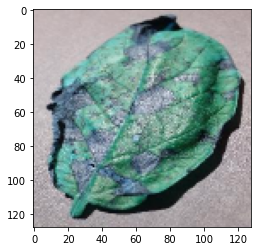

In [22]:
plt.imshow(train_x[100])
plt.show
print(classes[train_y[100]])

Tomato_Leaf_Mold


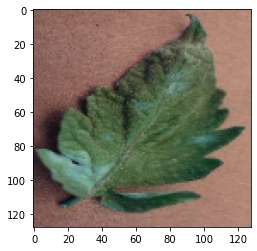

In [25]:
plt.imshow(train_x[80])
plt.show
print(classes[train_y[80]])

In [24]:
from tensorflow.keras.preprocessing import image
test=train_x[100]
test=image.img_to_array(test)
test=test.reshape((-1,img_size,img_size,3))
predictions = model.predict(test)
predictions

array([[1.2955404e-12, 9.1862174e-16, 9.9999619e-01, 7.5755334e-14,
        2.9898912e-09, 1.5799646e-09, 2.4403505e-18, 6.3056008e-15,
        4.8707774e-12, 1.9688966e-11, 2.0565876e-06, 1.7082017e-06,
        7.8362716e-12, 1.2901286e-07, 3.1432013e-13]], dtype=float32)

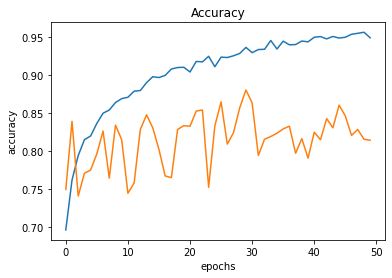

In [29]:
plt.figure(0)
plt.plot(custom.history['accuracy'], label = 'training accuracy')
plt.plot(custom.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

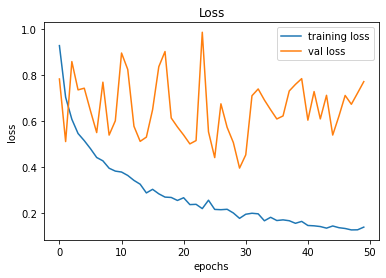

In [30]:
plt.plot(custom.history['loss'], label='training loss')
plt.plot(custom.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()